<a href="https://colab.research.google.com/github/rachid-drago/projet-ACP-AFC/blob/master/AFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Réalisé par: Rachid saidane  info 2 B

In [0]:
pip install fanalysis

In [0]:
from google.colab import files
upladed = files.upload()

Saving AFC .csv to AFC  (1).csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fanalysis.ca import CA
%matplotlib inline

In [0]:
df = pd.read_csv('/content/AFC .csv',header=0, index_col=0, encoding="utf-8")

In [0]:
df.head(15)

,Wife,Alternating,Husband,Jointly
Laundry,156,14,2,4
Main_Meal,124,20,5,4
Dinner,77,11,7,13
Breakfast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3
Financies,13,13,21,66


In [0]:
X=df.values

In [0]:
my_ca = CA(row_labels=df.index.values, col_labels=df.columns.values)

In [0]:
my_ca.fit(X)

CA(col_labels=array(['Wife', 'Alternating', 'Husband ', 'Jointly'], dtype=object),
   n_components=None,
   row_labels=array(['Laundry', 'Main_Meal', 'Dinner', 'Breakfast', 'Tidying', 'Dishes',
       'Shopping', 'Official', 'Driving', 'Financies', 'Insurance',
       'Repairs', 'Holidays'], dtype=object),
   stats=True)

##Analyse des valeurs propres
en 1ère ligne: les valeurs propres en valeur absolue
en 2ème ligne: les valeurs propres en pourcentage de la variance totale
en 3ème ligne: les valeurs propres en pourcentage cumulé de la variance


In [0]:
print(my_ca.eig_)

[[  0.54288928   0.44500276   0.12704843]
 [ 48.69222124  39.91269215  11.39508662]
 [ 48.69222124  88.60491338 100.        ]]


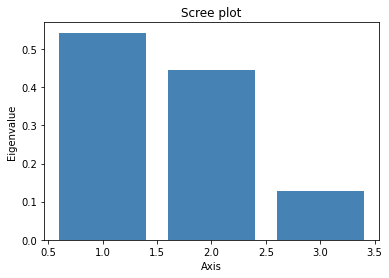

In [0]:
my_ca.plot_eigenvalues()

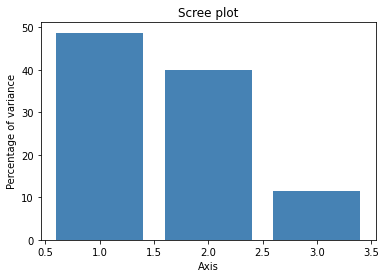

In [0]:
my_ca.plot_eigenvalues(type="percentage")

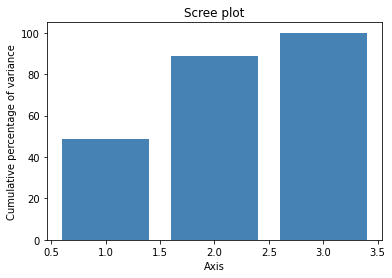

In [0]:
my_ca.plot_eigenvalues(type="cumulative")

Selon le graphique ci-dessus, seules les dimensions 1 et 2 doivent être considérées pour l’interprétation de la solution. La dimension 3 explique seulement 11,4% de l’inertie totale, ce qui est inférieur à la valeur moyenne des axes (33,33%) et trop petit pour être conservé pour une analyse plus approfondie.

##Extraction des statistiques sur les points lignes


In [0]:
df_rows = my_ca.row_topandas()

In [0]:
df_rows

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_contrib_dim1,row_contrib_dim2,row_contrib_dim3,row_cos2_dim1,row_cos2_dim2,row_cos2_dim3
Laundry,-0.991837,-0.495322,-0.316729,18.286700,5.563891,7.968424,0.739987,0.184552,0.075460
Main_Meal,-0.875585,-0.490109,-0.164065,12.388843,4.735523,1.858689,0.741603,0.232359,0.026038
Dinner,-0.692574,-0.308104,-0.207414,5.471398,1.321022,2.096926,0.776640,0.153703,0.069657
Breakfast,-0.508600,-0.452804,0.220405,3.824928,3.698613,3.069399,0.504943,0.400230,0.094827
Tidying,-0.393808,0.434344,-0.094214,1.998352,2.965644,0.488734,0.439812,0.535015,0.025172
Dishes,-0.188964,0.441966,0.266949,0.426166,2.844117,3.634294,0.118118,0.646153,0.235730
Shopping,-0.117681,0.403317,0.202615,0.175525,2.515158,2.223357,0.063654,0.747655,0.188691
Official,0.226632,-0.253613,0.923364,0.520784,0.795620,36.940389,0.053045,0.066426,0.880529
Driving,0.741770,-0.653414,0.544458,8.077837,7.646856,18.596386,0.432019,0.335229,0.232752
Financies,0.270767,0.617868,0.034797,0.875008,5.558546,0.061751,0.160677,0.836670,0.002654


#Statistiques pour les points lignes


In [0]:
# Coordonnées des points lignes
print(my_ca.row_coord_)

[[-0.99183679 -0.49532195 -0.31672897]
 [-0.87558546 -0.4901092  -0.16406487]
 [-0.69257396 -0.3081043  -0.20741377]
 [-0.50860018 -0.45280376  0.22040453]
 [-0.39380836  0.43434437 -0.09421375]
 [-0.18896406  0.44196625  0.26694926]
 [-0.11768132  0.40331711  0.20261512]
 [ 0.22663239 -0.25361319  0.92336416]
 [ 0.74176958 -0.65341434  0.54445849]
 [ 0.27076688  0.61786838  0.03479681]
 [ 0.64707595  0.47378315 -0.28936051]
 [ 1.52877865 -0.86426469 -0.47208778]
 [ 0.2524863   1.43500661 -0.12958665]]


In [0]:
# Contributions des points lignes
print(my_ca.row_contrib_)

[[18.28670025  5.56389126  7.96842443]
 [12.3888433   4.73552302  1.85868941]
 [ 5.47139817  1.32102207  2.09692603]
 [ 3.82492836  3.69861312  3.06939857]
 [ 1.99835183  2.96564413  0.48873403]
 [ 0.42616632  2.84411704  3.63429434]
 [ 0.17552483  2.51515844  2.22335679]
 [ 0.52078375  0.79562006 36.94038942]
 [ 8.07783707  7.64685639 18.59638635]
 [ 0.87500751  5.55854595  0.06175066]
 [ 6.14706157  4.02035904  5.25263863]
 [40.73009401 15.88065088 16.59639139]
 [ 1.07730303 42.45399859  1.21261994]]


In [0]:
# Cos2 des points lignes
print(my_ca.row_cos2_)

[[0.73998741 0.18455213 0.07546047]
 [0.74160285 0.23235928 0.02603787]
 [0.77664011 0.15370323 0.06965666]
 [0.50494329 0.40023001 0.0948267 ]
 [0.43981243 0.53501508 0.02517249]
 [0.11811778 0.64615253 0.23572969]
 [0.06365362 0.74765514 0.18869124]
 [0.05304464 0.06642648 0.88052888]
 [0.4320186  0.33522911 0.23275229]
 [0.16067678 0.83666958 0.00265363]
 [0.57601197 0.30880208 0.11518595]
 [0.70673575 0.22587147 0.06739278]
 [0.02979239 0.96235977 0.00784784]]


#Extraction des statistiques sur les points colonnes


In [0]:
df_cols = my_ca.col_topandas()

In [0]:
print(df_cols)

             col_coord_dim1  col_coord_dim2  ...  col_cos2_dim2  col_cos2_dim3
Wife              -0.837622       -0.365221  ...       0.152448       0.045676
Alternating       -0.062185       -0.291594  ...       0.105102       0.890119
Husband            1.160918       -0.601920  ...       0.207542       0.020432
Jointly            0.149426        1.026579  ...       0.977294       0.002000

[4 rows x 9 columns]


#Statistiques pour les points colonnes


In [0]:
# Coordonnées des points colonnes
print(my_ca.col_coord_)

[[-0.83762154 -0.36522071 -0.19991139]
 [-0.06218462 -0.29159381  0.84858939]
 [ 1.16091847 -0.60191992 -0.18885924]
 [ 0.14942609  1.02657907 -0.04644302]]


In [0]:
# Contributions des points colonnes
print(my_ca.col_contrib_)

[[44.46201836 10.31223659 10.82207533]
 [ 0.10373896  2.78279449 82.54924637]
 [54.23387887 17.78661168  6.13317917]
 [ 1.20036381 69.11835725  0.49549913]]


In [0]:
# Cos2 des points colonnes
print(my_ca.col_cos2_)

[[0.80187595 0.15244821 0.04567585]
 [0.0047799  0.10510158 0.89011852]
 [0.77202624 0.20754203 0.02043173]
 [0.02070586 0.97729391 0.00200024]]


#Analyse du 1er axe - Points lignes


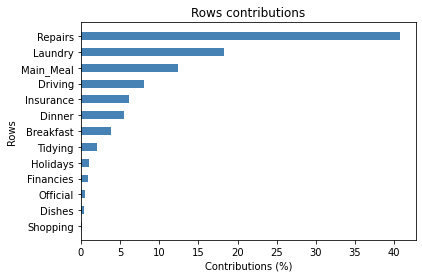

In [0]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_ca.plot_row_contrib(num_axis=1)

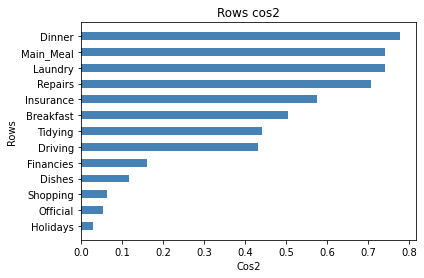

In [0]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_ca.plot_row_cos2(num_axis=1)

#Analyse du 1er axe - Points colonnes


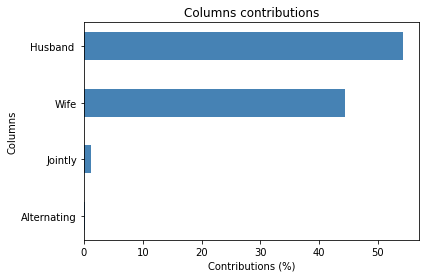

In [0]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_ca.plot_col_contrib(num_axis=1)

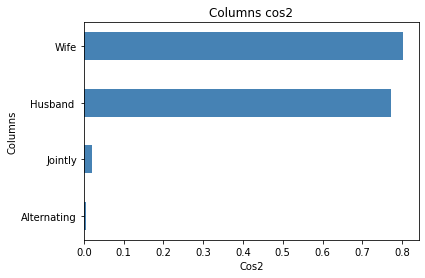

In [0]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_ca.plot_col_cos2(num_axis=1)

##**Graphiques**

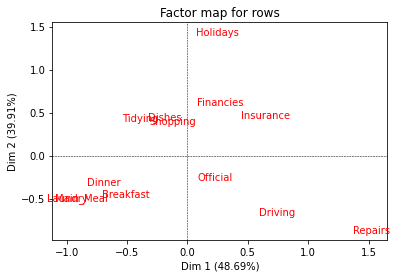

In [0]:
# Mapping des points lignes
my_ca.mapping_row(num_x_axis=1, num_y_axis=2)

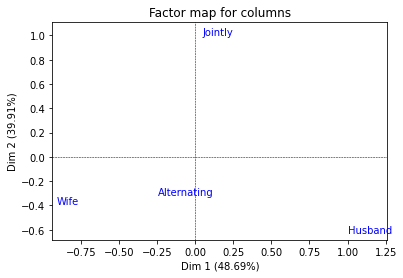

In [0]:
# Mapping des points colonnes
my_ca.mapping_col(num_x_axis=1, num_y_axis=2)

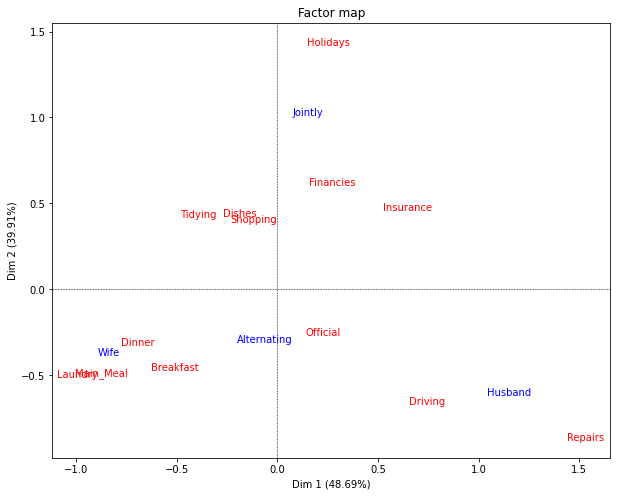

In [0]:
# Mapping simultané des points lignes et colonnes
#my_ca.mapping(num_x_axis=1, num_y_axis=2)
my_ca.mapping(1, 2, figsize=(10, 8))

La distance entre les points lignes ou entre les points colonnes donne une mesure de leur similitude (ou dissemblance). Les points lignes avec un profil similaire sont proches sur le graphique. Il en va de même pour les points colonnes.

Ce graphique montre que:

Les lignes Dinner, Breakfeast et Laundry sont associées le le plus à la colonne Wife
Les lignes Driving et Repairs sont associées le plus à la colonne Husband.